# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [31]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    #print(score)
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: -1.0


When finished, you can close the environment.

In [7]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [5]:
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import torch

In [6]:
# Instantiate the Agent 
from dqn_agent import Agent


# train the Agent 
def dqn(checkpoint, n_episodes=800, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        #state = env.reset()
        
        state = env_info.vector_observations[0]            # get the current state
        score = 0 
        for t in range(max_t):
            action = agent.act(state, eps)
            # In OpenAI Gym env
            #next_state, reward, done, _ = env.step(action)
            #action = np.random.randint(action_size)        # select an action
            
            # In Unity env
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            
            agent.step(state, action, reward, next_state, done)

            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), checkpoint)
            break
            
    return scores

def plot_scores(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score'); plt.xlabel('Episode #')
    plt.show()


## Experiment 1 

Regular Deep Q network with experience replay

Episode 100	Average Score: 0.71
Episode 200	Average Score: 3.47
Episode 300	Average Score: 7.24
Episode 400	Average Score: 11.14
Episode 500	Average Score: 12.51
Episode 518	Average Score: 13.01
Environment solved in 418 episodes!	Average Score: 13.01


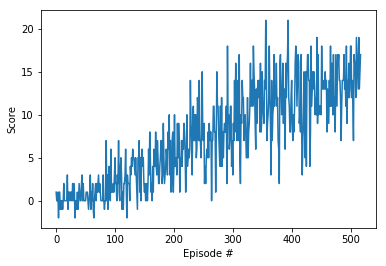

In [11]:
agent = Agent(state_size, action_size, seed=0, dueling=False, ddqn=False, buffer_size=int(1e5) )

scores = dqn('e1-initial.pth'); plot_scores(scores)


## Experiment 2

Deep Q-Network with dueling DQN


Episode 100	Average Score: 0.04
Episode 200	Average Score: 2.19
Episode 300	Average Score: 6.33
Episode 400	Average Score: 9.60
Episode 500	Average Score: 12.19
Episode 530	Average Score: 13.00
Environment solved in 430 episodes!	Average Score: 13.00


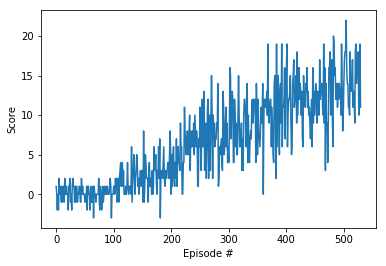

In [12]:
agent = Agent(state_size, action_size, seed=0, dueling=True, ddqn=False, buffer_size=int(1e5) )

scores = dqn('e2-dueling.pth'); plot_scores(scores)


## Experiment 3

Deep Q-Network with double DQN 


Episode 100	Average Score: 0.77
Episode 200	Average Score: 3.65
Episode 300	Average Score: 7.20
Episode 400	Average Score: 9.51
Episode 500	Average Score: 12.04
Episode 523	Average Score: 13.05
Environment solved in 423 episodes!	Average Score: 13.05


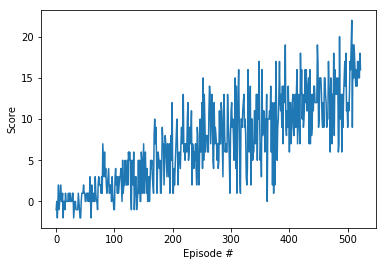

In [13]:
agent = Agent(state_size, action_size, seed=0, dueling=False, ddqn=True, buffer_size=int(1e5) )

scores = dqn('e3-ddqn.pth'); plot_scores(scores)


## Experiment 4

Deep Q-Network with dueling and double DQN 

Episode 100	Average Score: 0.60
Episode 200	Average Score: 4.27
Episode 300	Average Score: 7.68
Episode 400	Average Score: 10.17
Episode 500	Average Score: 12.93
Episode 509	Average Score: 13.06
Environment solved in 409 episodes!	Average Score: 13.06


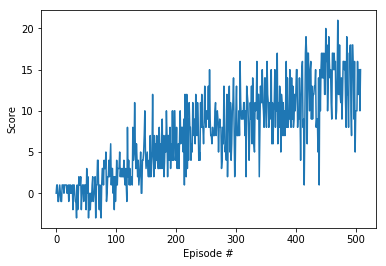

In [7]:
agent = Agent(state_size, action_size, seed=0, dueling=True, ddqn=True, buffer_size=int(1e5) )

scores = dqn('e4-dueling+ddqn.pth'); plot_scores(scores)


## Experiment 5

Deep Q-Network with dueling and double DQN, with smaller epsilon decay value (faster epsilon decay)

Episode 100	Average Score: 1.96
Episode 200	Average Score: 6.45
Episode 300	Average Score: 11.52
Episode 350	Average Score: 13.08
Environment solved in 250 episodes!	Average Score: 13.08


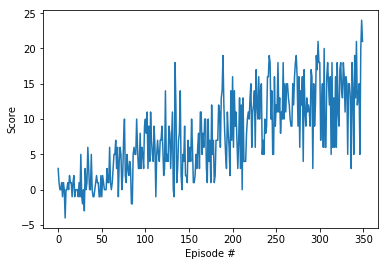

In [8]:
agent = Agent(state_size, action_size, seed=0, dueling=True, ddqn=True, buffer_size=int(1e5) )

scores = dqn('e5-dueling+ddqn+eps_decay-0p98.pth', eps_decay=0.98); plot_scores(scores)


## Experiment 6

Deep Q-Network with dueling and double DQN, with even smaller epsilon decay value (faster epsilon decay)

Episode 100	Average Score: 0.53
Episode 200	Average Score: 4.05
Episode 300	Average Score: 6.53
Episode 400	Average Score: 10.68
Episode 478	Average Score: 13.09
Environment solved in 378 episodes!	Average Score: 13.09


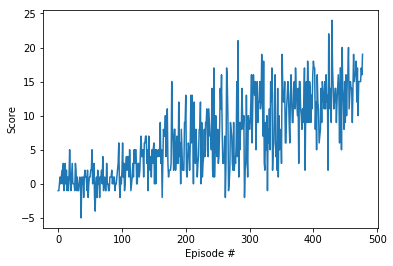

In [9]:
agent = Agent(state_size, action_size, seed=0, dueling=True, ddqn=True, buffer_size=int(1e5) )

scores = dqn('e6-dueling+ddqn+eps_decay-0p97.pth', eps_decay=0.97); plot_scores(scores)


## Experiment 7

Deep Q-Network with dueling and double DQN, no epsilon decay (epsilon decay value = 1 in the dqn method, which refers to a random choice of action selection)

Episode 100	Average Score: 0.22
Episode 200	Average Score: 0.002
Episode 300	Average Score: -0.07
Episode 400	Average Score: 0.263
Episode 500	Average Score: -0.15
Episode 600	Average Score: -0.03
Episode 700	Average Score: -0.06
Episode 800	Average Score: -0.02


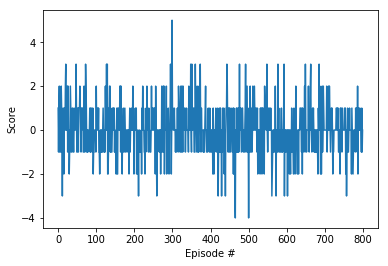

In [10]:
agent = Agent(state_size, action_size, seed=0, dueling=True, ddqn=True, buffer_size=int(1e5) )

scores = dqn('e7-dueling+ddqn+eps_decay-1p0.pth', eps_decay=1); plot_scores(scores)

## Experiment 8 
Changing the replay buffer size value

Episode 100	Average Score: 0.73
Episode 200	Average Score: 3.86
Episode 300	Average Score: 7.16
Episode 400	Average Score: 8.81
Episode 500	Average Score: 10.25
Episode 600	Average Score: 10.41
Episode 700	Average Score: 11.96
Episode 800	Average Score: 12.40


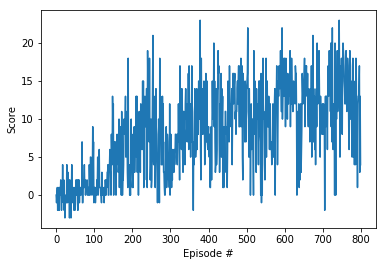

In [10]:
# BUFFER_SIZE = 1e3

agent = Agent(state_size, action_size, seed=0, dueling=True, ddqn=True, buffer_size=int(1e3) )

scores = dqn('e8-dqn_Replay_Buffer-1e3.pth', eps_decay=0.98); plot_scores(scores)

Episode 100	Average Score: 2.61
Episode 200	Average Score: 6.51
Episode 300	Average Score: 10.99
Episode 368	Average Score: 13.05
Environment solved in 268 episodes!	Average Score: 13.05


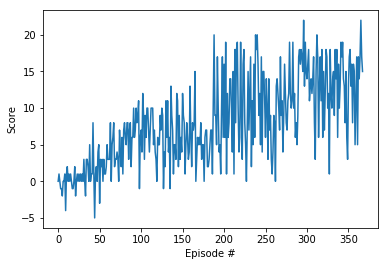

In [7]:
# BUFFER_SIZE = 1e5

agent = Agent(state_size, action_size, seed=0, dueling=True, ddqn=True, buffer_size=int(1e5) )

scores = dqn('e8-dqn_Replay_Buffer-1e8.pth', eps_decay=0.98); plot_scores(scores)

Episode 100	Average Score: 0.54
Episode 200	Average Score: 7.25
Episode 300	Average Score: 9.74
Episode 399	Average Score: 13.02
Environment solved in 299 episodes!	Average Score: 13.02


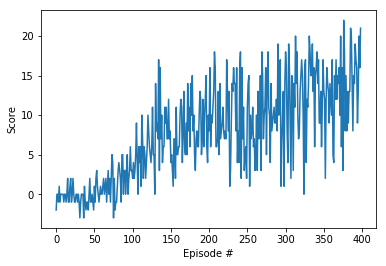

In [8]:
# BUFFER_SIZE = 1e8

agent = Agent(state_size, action_size, seed=0, dueling=True, ddqn=True, buffer_size=int(1e8) )

scores = dqn('e8-dqn_Replay_Buffer-1e5.pth', eps_decay=0.98); plot_scores(scores)

## Comparison of the trained agents from the experiments above 

In [42]:
# initialize the agents
agents = [Agent(state_size, action_size, seed=0, dueling=False, ddqn=False, buffer_size=int(1e5)), 
          Agent(state_size, action_size, seed=0, dueling=True, ddqn=False, buffer_size=int(1e5)),
          Agent(state_size, action_size, seed=0, dueling=False, ddqn=True, buffer_size=int(1e5)),
          Agent(state_size, action_size, seed=0, dueling=True, ddqn=True, buffer_size=int(1e5)),
          Agent(state_size, action_size, seed=0, dueling=True, ddqn=True, buffer_size=int(1e5))]

# load the weights from corresponding file
checkpoints = ['e1-initial.pth',
               'e2-dueling.pth', 
               'e3-dueling+ddqn.pth',
               'e4-dueling+ddqn.pth', 
               'e5-dueling+ddqn+eps_decay-0p98.pth']

def test(agent):
    num_episodes = 10
    scores = []
    rolling_mean=[]
    for i_episode in range(1,num_episodes+1):
        env_info = env.reset(train_mode=False)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score
        while True:
            action = agent.act(state, eps=0)               # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            #agent.step(state, action, reward, next_state, done) # do the learning

            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                scores.append(score)
                rolling_mean.append(np.mean(scores))
                print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
                break
    return scores, rolling_mean


scores = []
rolling_mean=[]
for i,agent in enumerate(agents):
    checkpoint=checkpoints[i]
    agent.qnetwork_local.load_state_dict(torch.load(checkpoint))
    result = test(agent)
    scores.append(result[0])
    rolling_mean.append(result[1])

Episode 1	Average Score: 0.00
Episode 2	Average Score: 9.00
Episode 3	Average Score: 10.33
Episode 4	Average Score: 12.00
Episode 5	Average Score: 12.80
Episode 6	Average Score: 13.67
Episode 7	Average Score: 14.00
Episode 8	Average Score: 13.88
Episode 9	Average Score: 15.00
Episode 10	Average Score: 16.00
Episode 1	Average Score: 1.00
Episode 2	Average Score: 8.00
Episode 3	Average Score: 5.67
Episode 4	Average Score: 5.25
Episode 5	Average Score: 5.40
Episode 6	Average Score: 4.83
Episode 7	Average Score: 4.29
Episode 8	Average Score: 3.75
Episode 9	Average Score: 4.33
Episode 10	Average Score: 4.10
Episode 1	Average Score: 19.00
Episode 2	Average Score: 12.50
Episode 3	Average Score: 11.67
Episode 4	Average Score: 11.75
Episode 5	Average Score: 10.00
Episode 6	Average Score: 10.33
Episode 7	Average Score: 10.71
Episode 8	Average Score: 11.25
Episode 9	Average Score: 12.33
Episode 10	Average Score: 11.90
Episode 1	Average Score: 18.00
Episode 2	Average Score: 17.50
Episode 3	Average

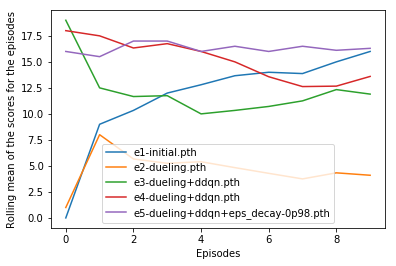

In [45]:
for i in rolling_mean:
    plt.plot( i)
    plt.legend(checkpoints)
    plt.xlabel('Episodes')
    plt.ylabel('Rolling mean of the scores for the episodes')
plt.show()

Indeed, the best performing agent is the one that has a slightly smaller eps_decay value of 0.98, compared to agents trained with value 0.995. 
Also, there is no significant difference from the implementation of double DQN and/or dueling DQN

In [10]:
env.close()